In [1]:
from XrayTo3DShape import load_json, MODEL_LABEL_COLOR

/mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
KEYS = [
    'SwinUNETR',
    'AttentionUnet',
    'TwoDPermuteConcat',
    'UNet',
    'MultiScale2DPermuteConcat',
    'UNETR',
    'TLPredictor',
    'OneDConcat',

]

In [4]:
import matplotlib.pyplot as plt
import scienceplots
import tueplots
from tueplots import figsizes, fontsizes
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'figure.dpi':150})
plt.rcParams.update(fontsizes.neurips2021())

In [44]:
ANGLE_PERTURBATIONS = [1,2,5,10]
hip_angle_perturbation_file = '../../angle_perturbation_results/hip_angle_perturbation.json'
hip_angle_perturbation = load_json(hip_angle_perturbation_file)

In [35]:
hip_angle_perturbation

{'SwinUNETR': {'DSC': {'0': 85.77611940298507,
   '1': [85.64179104477613],
   '2': [85.04477611940298],
   '5': [82.70149253731343],
   '10': [78.64179104477613]},
  'HD95': {'0': 2.5519402985074624,
   '1': [2.5768656716417913],
   '2': [2.609253731343284],
   '5': [2.973731343283583],
   '10': [3.735373134328358]},
  'ASD': {'0': 0.8129850746268656,
   '1': [0.8225373134328359],
   '2': [0.8494029850746269],
   '5': [0.9759701492537314],
   '10': [1.2114925373134326]},
  'NSD': {'0': 0.5376119402985076,
   '1': [0.5343283582089552],
   '2': [0.52],
   '5': [0.46835820895522384],
   '10': [0.4159701492537313]}},
 'AttentionUnet': {'DSC': {'0': 85.02985074626864,
   '1': [84.94029850746269],
   '2': [84.59701492537313],
   '5': [82.88059701492537],
   '10': [79.23880597014926]},
  'HD95': {'0': 2.595373134328358,
   '1': [2.6029850746268655],
   '2': [2.620447761194029],
   '5': [2.8900000000000006],
   '10': [3.4586567164179107]},
  'ASD': {'0': 0.7758208955223881,
   '1': [0.7822388

In [36]:
hip_angle_perturbation.keys()

dict_keys(['SwinUNETR', 'AttentionUnet', 'TwoDPermuteConcat', 'UNet', 'MultiScale2DPermuteConcat', 'UNETR', 'TLPredictor', 'OneDConcat'])

'1'
'1'


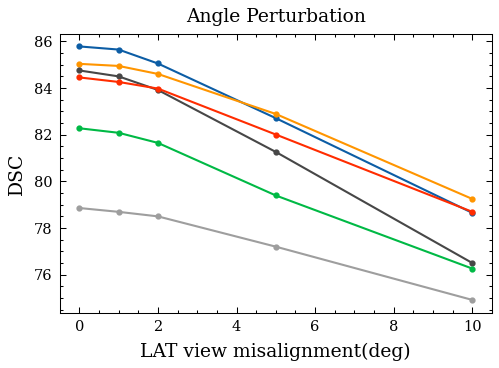

In [51]:
fig, ax = plt.subplots(1,1)
for model in KEYS:
    try:
        angle_perturbed_dsc = [hip_angle_perturbation[model]['DSC'][str(0)]]
        angle_perturbed_dsc.extend([ hip_angle_perturbation[model]['DSC'][str(angle)][0] for angle in ANGLE_PERTURBATIONS])
        ax.plot([0,1,2,5,10],angle_perturbed_dsc,'-o',label=model,markersize=2,c=MODEL_LABEL_COLOR[model])
    except KeyError as e:
        print(e)
ax.set_ylabel('DSC')
ax.set_xlabel('LAT view misalignment(deg)')
ax.set_title('Angle Perturbation')
plt.tight_layout()
plt.show()